In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score
from imblearn.over_sampling import RandomOverSampler

In [2]:
train_url = "./Data/Train/train_data.csv"
test_url = "./Data/Test/test_data.csv"

train_data = pd.read_csv(train_url)
test_data = pd.read_csv(test_url)

print(train_data.shape)
print(test_data.shape)
train_data.head()

(800000, 8)
(200000, 8)


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,5.572427,4.850337,1.149870,1.0,0.0,0.0,0.0,0.0
1,5.327530,3.933291,1.682739,1.0,1.0,0.0,1.0,0.0
2,78.945633,0.023222,2.740935,1.0,1.0,0.0,1.0,0.0
3,10.119026,26.548445,1.945075,1.0,0.0,0.0,0.0,0.0
4,33.646388,1.909240,0.888281,1.0,0.0,0.0,0.0,0.0


In [3]:
train_X, train_Y = train_data.drop("fraud", axis=1), train_data["fraud"]
test_X, test_Y = test_data.drop("fraud", axis=1), test_data["fraud"]
print("Train Data Shape", train_X.shape, train_Y.shape)
print(train_Y.value_counts())
print("Test Data Shape", test_X.shape, test_Y.shape)
print(test_Y.value_counts())
train_X.head()

Train Data Shape (800000, 7) (800000,)
0.0    730181
1.0     69819
Name: fraud, dtype: int64
Test Data Shape (200000, 7) (200000,)
0.0    182416
1.0     17584
Name: fraud, dtype: int64


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,5.572427,4.850337,1.149870,1.0,0.0,0.0,0.0
1,5.327530,3.933291,1.682739,1.0,1.0,0.0,1.0
2,78.945633,0.023222,2.740935,1.0,1.0,0.0,1.0
3,10.119026,26.548445,1.945075,1.0,0.0,0.0,0.0
4,33.646388,1.909240,0.888281,1.0,0.0,0.0,0.0


In [4]:
#To put results into table
score = dict()
score["Scaling"] = []
score["Resampling"] = []
score["class_weight"] = []
score["F1"] = []
score["Accuracy"] = []

## Logistic Regression 

### Model 0: Naive Logistic Regression

In [5]:
#train model with training data
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(train_X, train_Y)

LogisticRegression(random_state=0, solver='liblinear')

In [6]:
#Get prediction 
predict_Y = model.predict(test_X)

In [7]:
#Get accuracy
acc = accuracy_score(test_Y, predict_Y)
print(acc)

0.95825


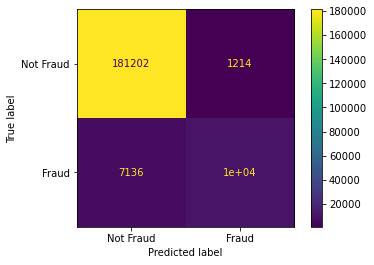

In [8]:
c_matrix = confusion_matrix(test_Y, predict_Y)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=["Not Fraud", "Fraud"])
disp.plot()

In [9]:
#print precision and recall
f1 = f1_score(test_Y, predict_Y)
print(f1)

0.7144908705463995


In [10]:
#Add to table
score["Scaling"].append("None")
score["Resampling"].append("None")
score["class_weight"].append("None")
score["F1"].append(f1)
score["Accuracy"].append(acc)

### Model 1: Standard Scaling

In [11]:
scaler = preprocessing.StandardScaler().fit(train_X)
train_X_scaled = scaler.transform(train_X)

scaler = preprocessing.StandardScaler().fit(test_X)
test_X_scaled = scaler.transform(test_X)

In [12]:
#train model with training data
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(train_X_scaled, train_Y)

LogisticRegression(random_state=0, solver='liblinear')

In [13]:
#Get prediction 
predict_Y = model.predict(test_X_scaled)

In [14]:
#Get accuracy
acc = accuracy_score(test_Y, predict_Y)
print(acc)

0.95847


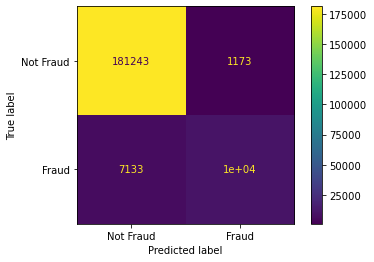

In [15]:
c_matrix = confusion_matrix(test_Y, predict_Y)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=["Not Fraud", "Fraud"])
disp.plot()

In [16]:
f1 = f1_score(test_Y, predict_Y)
print(f1)

0.7156258559298821


In [17]:
#Add to table
score["Scaling"].append("Standard")
score["Resampling"].append("None")
score["class_weight"].append("None")
score["F1"].append(f1)
score["Accuracy"].append(acc)

### Model 2: Min-Max Scaling

In [18]:
#Normalize each feature/column
for i in range(train_X.shape[1]):
    train_X_scaled[:,i] = (train_X.iloc[:,i] - min(train_X.iloc[:,i]))/(max(train_X.iloc[:,i])-min(train_X.iloc[:,i]))

for i in range(test_X.shape[1]):
    test_X_scaled[:,i] = (test_X.iloc[:,i] - min(test_X.iloc[:,i]))/(max(test_X.iloc[:,i])-min(test_X.iloc[:,i]))


In [19]:
#train model with training data
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(train_X_scaled, train_Y)

LogisticRegression(random_state=0, solver='liblinear')

In [20]:
#Get prediction 
predict_Y = model.predict(test_X_scaled)

In [21]:
#Get accuracy
acc = accuracy_score(test_Y, predict_Y)
print(acc)

0.920835


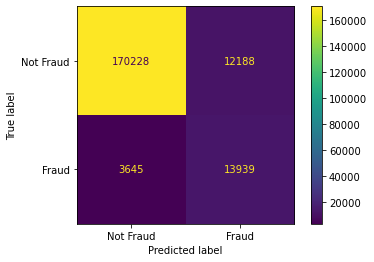

In [22]:
c_matrix = confusion_matrix(test_Y, predict_Y)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=["Not Fraud", "Fraud"])
disp.plot()

In [23]:
f1 = f1_score(test_Y, predict_Y)
print(f1)

0.6377799638534921


In [24]:
#Add to table
score["Scaling"].append("Min-Max")
score["Resampling"].append("None")
score["class_weight"].append("None")
score["F1"].append(f1)
score["Accuracy"].append(acc)

### Model 3: Accounting for class imbalance

In [25]:
#train model with training data
model = LogisticRegression(solver='liblinear', random_state=0, class_weight='balanced')
model.fit(train_X, train_Y)

LogisticRegression(class_weight='balanced', random_state=0, solver='liblinear')

In [26]:
#Get prediction 
predict_Y = model.predict(test_X)

In [27]:
#Get accuracy
acc = accuracy_score(test_Y, predict_Y)
print(acc)

0.934535


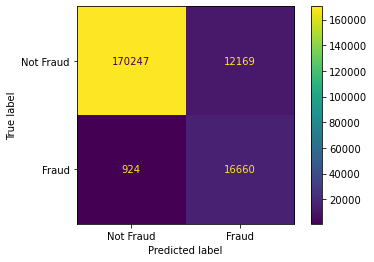

In [28]:
c_matrix = confusion_matrix(test_Y, predict_Y)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=["Not Fraud", "Fraud"])
disp.plot()

In [29]:
f1 = f1_score(test_Y, predict_Y)
print(f1)

0.7179023118522827


In [30]:
#Add to table
score["Scaling"].append("None")
score["Resampling"].append("None")
score["class_weight"].append("Balanced")
score["F1"].append(f1)
score["Accuracy"].append(acc)

### Model 4: Accounting for class imbalance + Standard scaling

In [31]:
scaler = preprocessing.StandardScaler().fit(train_X)
train_X_scaled = scaler.transform(train_X)

scaler = preprocessing.StandardScaler().fit(test_X)
test_X_scaled = scaler.transform(test_X)

In [32]:
#train model with training data
model = LogisticRegression(solver='liblinear', random_state=0, class_weight='balanced')
model.fit(train_X_scaled, train_Y)

LogisticRegression(class_weight='balanced', random_state=0, solver='liblinear')

In [33]:
#Get prediction 
predict_Y = model.predict(test_X_scaled)

In [34]:
#Get accuracy
acc = accuracy_score(test_Y, predict_Y)
print(acc)

0.93336


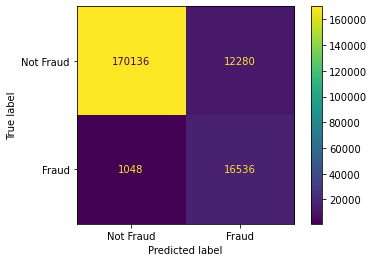

In [35]:
c_matrix = confusion_matrix(test_Y, predict_Y)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=["Not Fraud", "Fraud"])
disp.plot()

In [36]:
f1 = f1_score(test_Y, predict_Y)
print(f1)

0.7127586206896553


In [37]:
#Add to table
score["Scaling"].append("Standard")
score["Resampling"].append("None")
score["class_weight"].append("Balanced")
score["F1"].append(f1)
score["Accuracy"].append(acc)

### Model 5: Accounting for class imbalance + Min-Max scaling

In [38]:
#Normalize each feature/column
for i in range(train_X.shape[1]):
    train_X_scaled[:,i] = (train_X.iloc[:,i] - min(train_X.iloc[:,i]))/(max(train_X.iloc[:,i])-min(train_X.iloc[:,i]))

for i in range(test_X.shape[1]):
    test_X_scaled[:,i] = (test_X.iloc[:,i] - min(test_X.iloc[:,i]))/(max(test_X.iloc[:,i])-min(test_X.iloc[:,i]))

In [39]:
#train model with training data
model = LogisticRegression(solver='liblinear', random_state=0, class_weight='balanced')
model.fit(train_X_scaled, train_Y)

LogisticRegression(class_weight='balanced', random_state=0, solver='liblinear')

In [40]:
#Get prediction 
predict_Y = model.predict(test_X_scaled)

In [41]:
#Get accuracy
acc = accuracy_score(test_Y, predict_Y)
print(acc)

0.762925


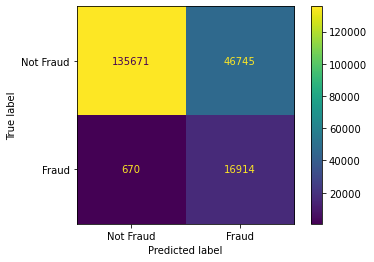

In [42]:
c_matrix = confusion_matrix(test_Y, predict_Y)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=["Not Fraud", "Fraud"])
disp.plot()

In [43]:
f1 = f1_score(test_Y, predict_Y)
print(f1)

0.4163804881651342


In [44]:
#Add to table
score["Scaling"].append("Min-Max")
score["Resampling"].append("None")
score["class_weight"].append("Balanced")
score["F1"].append(f1)
score["Accuracy"].append(acc)

### Model 6: Random Oversampling

In [45]:
#random oversampling
rand = RandomOverSampler(random_state=2023, sampling_strategy='minority')
X_train_rand, y_train_rand = rand.fit_resample(train_X, train_Y)

In [46]:
#train model with training data
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train_rand, y_train_rand)

LogisticRegression(random_state=0, solver='liblinear')

In [47]:
#Get prediction 
predict_Y = model.predict(test_X)

In [48]:
#Get accuracy
acc = accuracy_score(test_Y, predict_Y)
print(acc)

0.93457


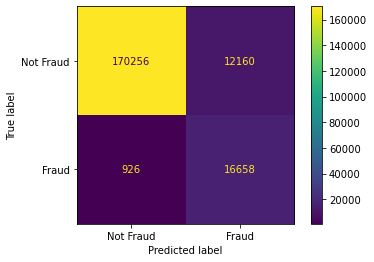

In [49]:
c_matrix = confusion_matrix(test_Y, predict_Y)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=["Not Fraud", "Fraud"])
disp.plot()

In [50]:
#print precision and recall
f1 = f1_score(test_Y, predict_Y)
print(f1)

0.7179862936942373


In [51]:
#Add to table
score["Scaling"].append("None")
score["Resampling"].append("Random")
score["class_weight"].append("None")
score["F1"].append(f1)
score["Accuracy"].append(acc)

## Results

In [52]:
pd.DataFrame.from_dict(score)

,Scaling,Resampling,class_weight,F1,Accuracy
0,None,None,None,0.714491,0.958250
1,Standard,None,None,0.715626,0.958470
2,Min-Max,None,None,0.637780,0.920835
3,None,None,Balanced,0.717902,0.934535
4,Standard,None,Balanced,0.712759,0.933360
5,Min-Max,None,Balanced,0.416380,0.762925
6,None,Random,None,0.717986,0.934570
